## 1. Dataset Introduction:

The dataset contains information related to diabetes, comprising various health-related features of individuals. Each row represents a different individual, and the columns provide details about their health attributes. Below are the headers of the dataset along with a brief description of each feature:

- **Pregnancies**: Number of times pregnant.
- **Glucose**: Plasma glucose concentration after 2 hours in an oral glucose tolerance test.
- **Blood Pressure**: Diastolic blood pressure (mm Hg).
- **SkinThickness**: Triceps skin fold thickness (mm).
- **Insulin**: 2-Hour serum insulin (mu U/ml).
- **BMI**: Body mass index (weight in kg/(height in m)^2).
- **DiabetesPedigreeFunction**: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history).
- **Age**: Age of the individual (years).
- **Outcome**: Binary variable indicating whether the individual has diabetes (1) or not (0).

This dataset will be used for predicting the likelihood of diabetes based on various health indicators and it will be employed in machine learning and predictive modeling tasks.


*Exploratory Data Analysis (EDA)* is a crucial step in understanding and summarizing the main characteristics of a dataset.
Here are some of the processes we are gonna perform:
<font color='red'>
-*Data Loading*
-*Data Inspection*
-*Data Cleaning*
-*Summary Statistics*
-*Data Visualization*
-*Feature Engineering*
-*Hypothesis Testing (optional)*
-*Dimensionality Reduction (optional)*
-*Data Preprocessing*
-*Documentation and Reporting*
</font>

In [2]:
import pandas as pd  # For data manipulation and analysis using DataFrame and Series data structures
import numpy as np   # For numerical computing and operations on arrays and matrices
import matplotlib.pyplot as plt  # For creating static plots and visualizations
import seaborn as sns   # For creating statistical visualizations with enhanced aesthetics
import plotly.graph_objs as go  # For creating interactive and publication-quality visualizations
import sklearn   # For machine learning algorithms, data preprocessing, and model evaluation

In [33]:
# Step 1: Data Loading
# Load the dataset into your analysis environment
diabetes_df = pd.read_csv("diabetes (2).csv")

# Step 2: Data Inspection
# Check the first few rows of the dataset
diabetes_df.head()

# Check the column names and data types
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Step 3: Data Cleaning
# Handle missing values
missing_values = diabetes_df.dropna(inplace=True)  # Drop rows with missing values
# Handle duplicate records
duplicate_rows = diabetes_df.drop_duplicates(inplace=True)  # Remove duplicate rows

print(missing_values) #output should contain null values
print(duplicate_rows) #output should contain null values

None
None


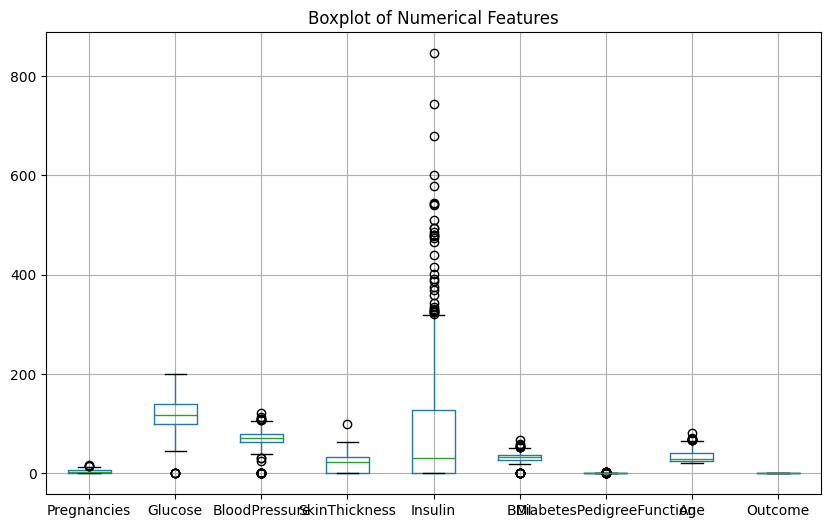

In [5]:
# step4: Outlier detection
# handling outliers. 
# Visualize box plots for numerical features
diabetes_df.boxplot(figsize=(10,6))
plt.title('Boxplot of Numerical Features')
plt.show()

In [32]:
#Calculate summary statistics and use thresholds based on standard deviation, percentile, or IQR (Interquartile Range) to identify outliers.

# Calculate summary statistics
summary_stats = diabetes_df.describe()

# Identify outliers using IQR method
Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = ((diabetes_df < lower_bound) | (diabetes_df > upper_bound)).any(axis=1)

#
summary_stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
print (Q1)
print (Q3)
print (lower_bound)
print (upper_bound)


Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.30000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 25%, dtype: float64
Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 75%, dtype: float64
Pregnancies                  -6.500
Glucose                      37.125
BloodPressure                35.000
SkinThickness               -48.000
Insulin                    -190.875
BMI                          13.350
DiabetesPedigreeFunction     -0.330
Age                  

In [8]:

print (outliers)# shows which numbers have outliers.

0      False
1      False
2      False
3      False
4       True
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool


In [31]:
# Remove outliers
diabetes_df_cleaned = diabetes_df[~outliers]
diabetes_df_cleaned


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


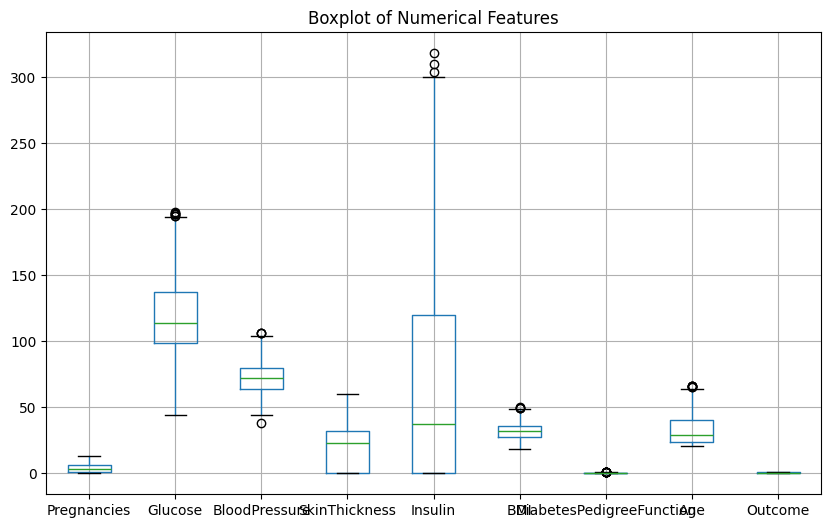

In [10]:
#we will check if there any more outliers left using the boxplot.
diabetes_df_cleaned.boxplot(figsize=(10,6))
plt.title('Boxplot of Numerical Features')
plt.show()

In [11]:
import numpy as np

# Define a function to detect outliers using z-score
def detect_outliers_zscore(data, threshold=2.3):
    z_scores = np.abs((diabetes_df_cleaned - np.mean(diabetes_df_cleaned, axis=0)) / np.std(diabetes_df_cleaned, axis=0))
    return z_scores >= threshold

# Example usage:
# Assuming 'data' is your numerical dataset
outliers_1 = detect_outliers_zscore(diabetes_df_cleaned)

# Print the indices of outliers
print("Indices of outliers:", np.where(outliers_1)[0])


# Print the indices of outliers
print("Indices of outliers:", np.where(outliers_1)[0])


Indices of outliers: [ 14  20  22  41  43  43  44  44  47  57  58  63  67  73  79  92 103 105
 117 119 123 124 124 125 131 151 162 169 169 170 175 178 178 182 183 208
 208 212 214 217 219 223 228 241 256 261 261 265 273 275 275 284 293 294
 294 295 296 301 307 308 308 315 316 325 334 334 337 337 340 349 356 357
 361 361 374 381 391 395 399 400 400 405 406 409 419 420 428 450 450 455
 464 464 477 478 483 483 488 489 493 496 502 524 543 544 546 555 556 560
 562 586 613 616 616 617 618 619 620 622 626 630 630 634]
Indices of outliers: [ 14  20  22  41  43  43  44  44  47  57  58  63  67  73  79  92 103 105
 117 119 123 124 124 125 131 151 162 169 169 170 175 178 178 182 183 208
 208 212 214 217 219 223 228 241 256 261 261 265 273 275 275 284 293 294
 294 295 296 301 307 308 308 315 316 325 334 334 337 337 340 349 356 357
 361 361 374 381 391 395 399 400 400 405 406 409 419 420 428 450 450 455
 464 464 477 478 483 483 488 489 493 496 502 524 543 544 546 555 556 560
 562 586 613 616 616 617

In [30]:
# Remove outliers
diabetes_df_cleaned_1 = diabetes_df_cleaned[~outliers_1]
diabetes_df_cleaned_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,NaN,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


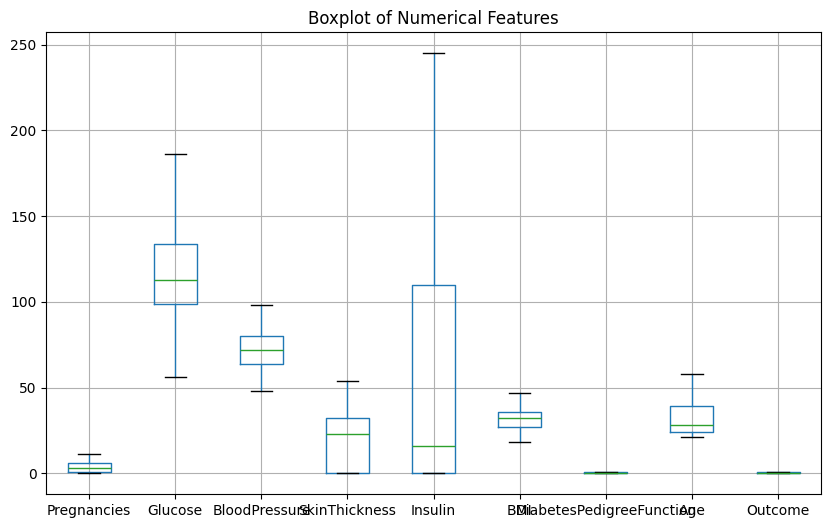

In [13]:
#we will check if there any more outliers left using the boxplot.
diabetes_df_cleaned_1.boxplot(figsize=(10,6))
plt.title('Boxplot of Numerical Features')
plt.show()

In [29]:
# Get information about the DataFrame
diabetes_df_cleaned_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               623 non-null    float64
 1   Glucose                   620 non-null    float64
 2   BloodPressure             625 non-null    float64
 3   SkinThickness             638 non-null    float64
 4   Insulin                   617 non-null    float64
 5   BMI                       630 non-null    float64
 6   DiabetesPedigreeFunction  619 non-null    float64
 7   Age                       618 non-null    float64
 8   Outcome                   639 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 49.9 KB


In [28]:
# Get summary statistics for numerical columns
print("DataFrame information:")
diabetes_df_cleaned_1.describe()

DataFrame information:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,623.000000,620.000000,625.000000,638.000000,617.000000,630.000000,619.000000,618.000000,639.000000
mean,3.581059,117.109677,71.995200,20.501567,58.340357,31.770476,0.406901,31.697411,0.312989
std,2.984326,26.595593,10.532838,15.272177,69.779343,6.166958,0.221466,9.757382,0.464073
min,0.000000,56.000000,48.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.225000,0.238000,24.000000,0.000000
50%,3.000000,113.000000,72.000000,23.000000,16.000000,32.000000,0.345000,28.000000,0.000000
75%,6.000000,134.000000,80.000000,32.000000,110.000000,35.800000,0.551000,39.000000,1.000000
max,11.000000,186.000000,98.000000,54.000000,245.000000,46.700000,1.001000,58.000000,1.000000


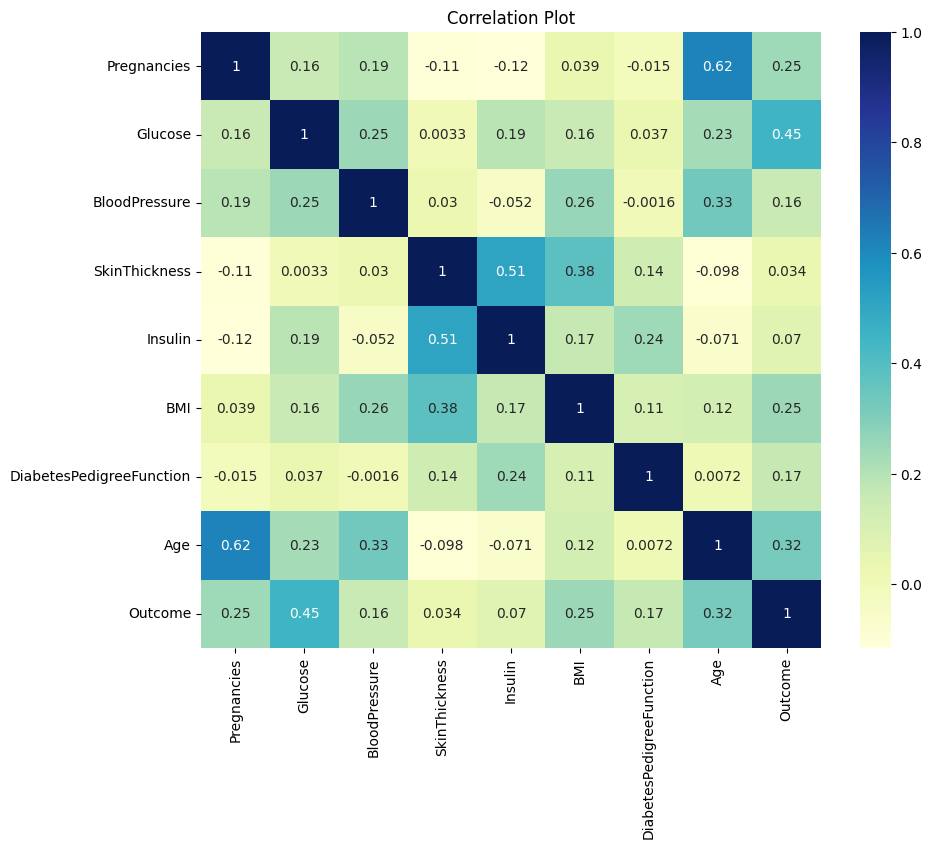

In [15]:

# Get correlation between numerical columns
corr = diabetes_df_cleaned_1.select_dtypes(include=['float64', 'int64']).corr()
# Create a correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlation Plot")
plt.show()

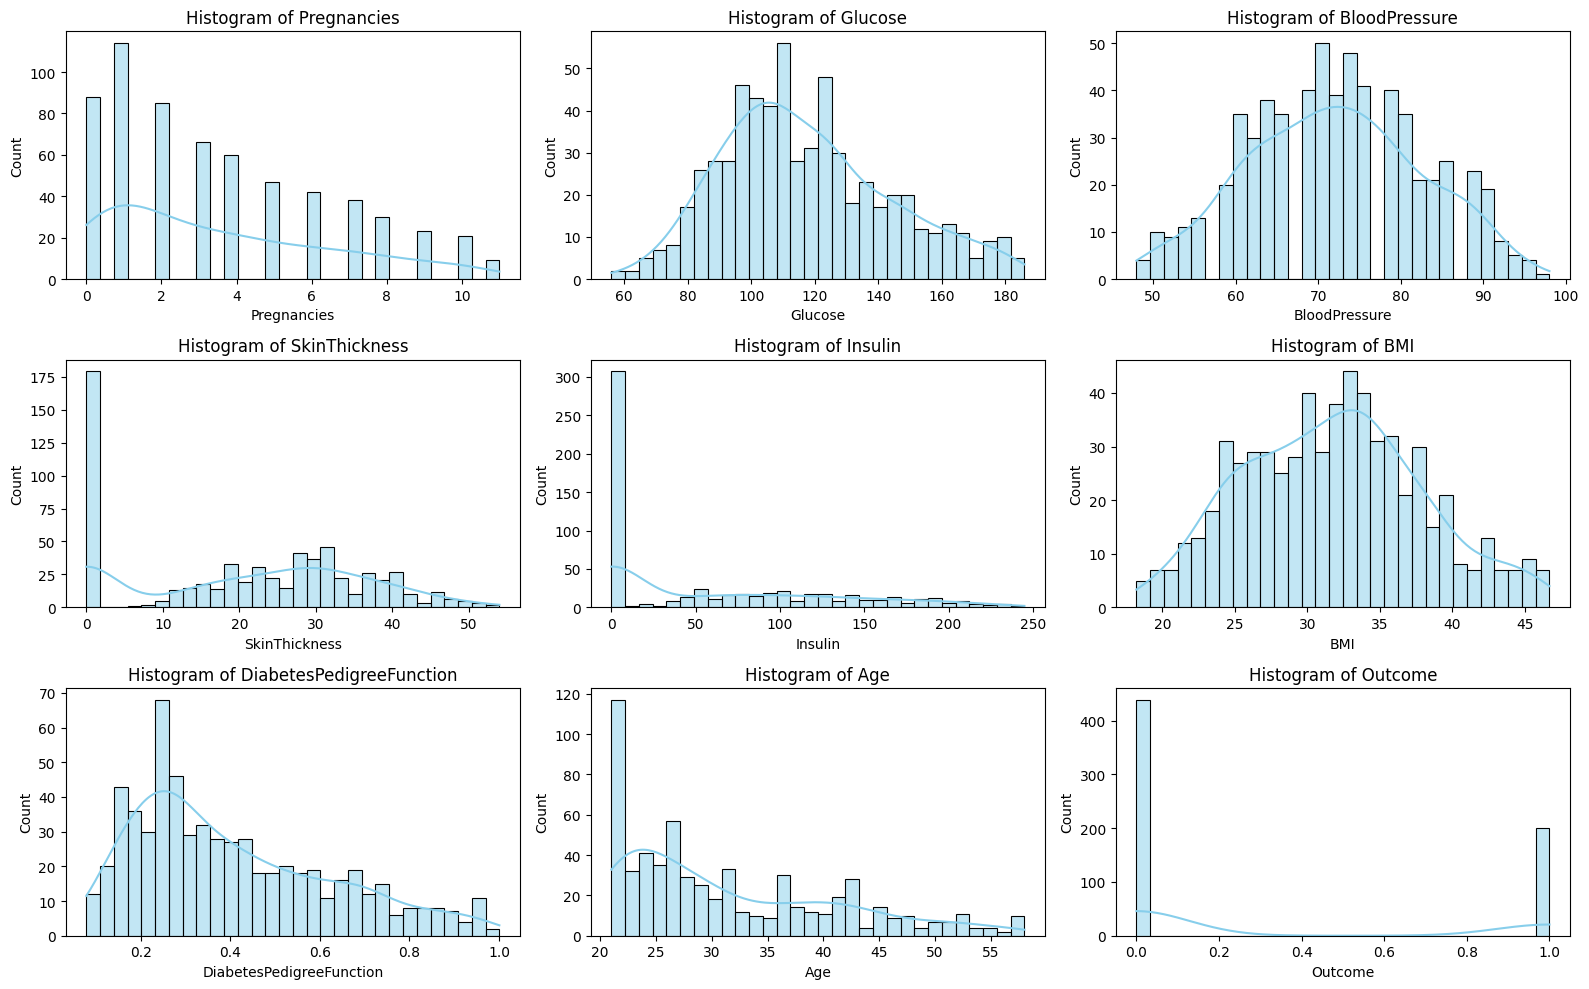

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(16, 10))

# Loop through each column and plot its histogram
for i, column in enumerate(diabetes_df_cleaned_1.columns):
    plt.subplot(3, 3, i + 1)  # Create subplot for each column
    sns.histplot(diabetes_df_cleaned_1[column], kde=True, color='skyblue', bins=30)
    plt.title(f'Histogram of {column}')  # Set title for each subplot
    plt.xlabel(column)  # Set x-axis label

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# Definition of Features:

(`numerical_features`): List of numerical features in the dataset.
(`categorical_features`): List of categorical features in the dataset.
Preprocessing Pipelines:
(`numerical_pipeline`)
Pipeline for preprocessing numerical features. 
It includes:
- Imputing missing values using the mean strategy (`SimpleImputer`).
- Standardizing the numerical features to have mean 0 and variance 1 (`StandardScaler`).
- Adding polynomial features up to degree 2 (`PolynomialFeatures`). This can potentially increase the complexity of the model by introducing interaction terms.

(`categorical_pipeline`): 
Pipeline for preprocessing categorical features.
It includes:
One-hot encoding categorical features (`OneHotEncoder`). This converts categorical variables into binary vectors.

(`ColumnTransformer`):
preprocessor: Combines the preprocessing pipelines defined above. It specifies which preprocessing steps to apply to which columns of the dataset. For numerical features, the numerical_pipeline is applied, and for categorical features, the categorical_pipeline is applied.

Data Transformation:
*diabetes_df_processed*: Applies the preprocessing steps defined in the preprocessor to the original dataset (`diabetes_df_cleaned_1`). This results in a transformed dataset where missing values are imputed, numerical features are standardized and possibly expanded with polynomial features, and categorical features are one-hot encoded.
After applying this preprocessing pipeline, your dataset may be expanded (if polynomial features are added) and transformed (if categorical features are one-hot encoded), but it does not necessarily reduce the dataset size.

In [53]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define numerical and categorical features
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
categorical_features = ['Outcome']  # Assuming 'Outcome' is categorical

# Define preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

# Apply preprocessing to the dataset
diabetes_df_processed = preprocessor.fit_transform(diabetes_df_cleaned_1)
diabetes_df_processed




array([[ 8.21550410e-01,  1.18009742e+00,  4.61162469e-04, ...,
         1.90891704e+00,  0.00000000e+00,  1.00000000e+00],
       [-8.76611187e-01, -1.22668022e+00, -5.75991924e-01, ...,
        -7.27383294e-02,  1.00000000e+00,  0.00000000e+00],
       [ 1.50081505e+00,  2.51719611e+00, -7.68142953e-01, ...,
         3.15593216e-02,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 4.81918090e-01,  1.48621292e-01,  4.61162469e-04, ...,
        -1.77035980e-01,  1.00000000e+00,  0.00000000e+00],
       [-8.76611187e-01,  3.39635390e-01, -1.15244501e+00, ...,
         1.59602409e+00,  0.00000000e+00,  1.00000000e+00],
       [-8.76611187e-01, -9.21057659e-01, -1.91689866e-01, ...,
        -9.07119537e-01,  1.00000000e+00,  0.00000000e+00]])

In [65]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define numerical and categorical features
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
categorical_features = ['Outcome']  # Assuming 'Outcome' is categorical

# Define preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
], remainder='passthrough')  # Keep any remaining columns (in this case, 'Outcome')

# Apply preprocessing to the dataset
diabetes_df_processed = preprocessor.fit_transform(diabetes_df_cleaned_1)


## Modelling

In this section, we perform the modelling phase of the machine learning workflow. The key steps are as follows:

1. **Data Preparation**:
   - We convert the preprocessed data (`diabetes_df_processed`) into a DataFrame (`diabetes_df_processed_df`) using Pandas.
   - The features (`X`) are separated from the target variable (`y`).

2. **Train-Test Split**:
   - The dataset is split into training and testing sets using the `train_test_split` function from Scikit-learn.
   - The split is stratified to ensure representative samples in both training (`X_train`, `y_train`) and testing (`X_test`, `y_test`) sets.
   - We allocate 80% of the data for training and 20% for testing, with a random state of 42 for reproducibility.

3. **Model Definition and Training**:
   - We define a Random Forest classifier (`rf_classifier`) with 100 decision tree estimators and set a random state of 42 for consistency.
   - The classifier is trained on the training data (`X_train`, `y_train`) using the `fit` method.

4. **Model Evaluation**:
   - We evaluate the trained model's performance by predicting outcomes (`y_pred`) on the testing set (`X_test`).
   - Classification metrics such as precision, recall, F1-score, and the confusion matrix are used to assess the model's effectiveness.
   - The detailed results of the model evaluation are presented in subsequent sections.

In [69]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Convert diabetes_df_processed to a DataFrame
diabetes_df_processed_df = pd.DataFrame(diabetes_df_processed)

# Separate features and target variable
X = diabetes_df_processed_df.drop(columns=[diabetes_df_processed_df.columns[-1]])  # Features (all columns except the last one)
y = diabetes_df_processed_df[diabetes_df_processed_df.columns[-1]]  # Target variable (last column)

# Rename the columns of the DataFrame
X.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
y.name = 'Outcome'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_classifier.predict(X_test)
y_pred

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0.])

# Classification Report:

- **Precision:** Precision measures the accuracy of positive predictions. It is the ratio of correctly predicted positive observations to the total predicted positives. A precision score of 1.00 indicates that all predicted positive cases were actually positive.
- **Recall:** Recall, also known as sensitivity, measures the ability of the model to find all the relevant cases within the dataset. It is the ratio of correctly predicted positive observations to the total actual positives. A recall score of 1.00 indicates that all actual positive cases were correctly predicted.
- **F1-score:** The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, with values ranging from 0 to 1, where 1 indicates the best performance.
- **Support:** The support is the number of actual occurrences of each class in the test dataset.
- **Accuracy:** Accuracy is the ratio of correctly predicted observations to the total observations in the dataset. An accuracy score of 1.00 indicates perfect predictions.
- **Macro avg:** The macro average calculates the metric independently for each class and then takes the average.
- **Weighted avg:** The weighted average calculates the metric for each class and weights it by the number of true instances in each class.

# Confusion Matrix:

The confusion matrix is a table that summarizes the performance of a classification algorithm. It compares the actual values of the target variable with the predicted values and shows the number of correct and incorrect predictions.

In the confusion matrix:
- The rows represent the actual classes.
- The columns represent the predicted classes.
- The diagonal elements represent the number of correct predictions (true positives and true negatives).
- Off-diagonal elements represent incorrect predictions (false positives and false negatives).

In my output:

The classification report indicates perfect performance with precision, recall, and F1-score all equal to 1.00 for both classes (0 and 1).
The confusion matrix confirms this perfect performance, with all predictions being correct (true positives and true negatives) and no false positives or false negatives.

In [70]:
print("Classification Report:")
print (classification_report(y_test, y_pred))
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        92
         1.0       1.00      1.00      1.00        36

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128

Confusion Matrix:


array([[92,  0],
       [ 0, 36]], dtype=int64)

## Testing the Model with Hypothetical Values

To assess how the trained model performs with hypothetical values representing potential risk factors for diabetes, we'll input these values into the model and observe the predictions.

### Hypothetical Values

We'll use the following hypothetical values for each characteristic:

- **Pregnancies:** 5
- **Glucose:** 140 mg/dL
- **BloodPressure:** 145/90 mmHg
- **SkinThickness:** 35 mm
- **Insulin:** 300 μU/mL
- **BMI:** 32 kg/m²
- **DiabetesPedigreeFunction:** 0.8
- **Age:** 55 years

### Model Prediction

We'll input these values into the trained model and obtain predictions for whether the individual is predicted to have diabetes (1) or not (0).

```python
import pandas as pd

# Create a DataFrame with the hypothetical values
hypothetical_values = pd.DataFrame({
    'Pregnancies': [5],
    'Glucose': [140],
    'BloodPressure': [145],
    'SkinThickness': [35],
    'Insulin': [300],
    'BMI': [32],
    'DiabetesPedigreeFunction': [0.8],
    'Age': [55]
})

# Use the trained model to make predictions
predictions = rf_classifier.predict(hypothetical_values)

# Display the predictions
print(predictions)


In [72]:
import pandas as pd

# Create a DataFrame with the hypothetical values
hypothetical_values = pd.DataFrame({
    'Pregnancies': [5],
    'Glucose': [140],
    'BloodPressure': [145],
    'SkinThickness': [35],
    'Insulin': [300],
    'BMI': [32],
    'DiabetesPedigreeFunction': [0.8],
    'Age': [55],
    'Outcome': [0]  # Placeholder value for the outcome
})

# Use the trained model to make predictions
predictions = rf_classifier.predict(hypothetical_values)
predictions

array([1.])